In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [6]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [7]:
wine['Class'].value_counts()

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

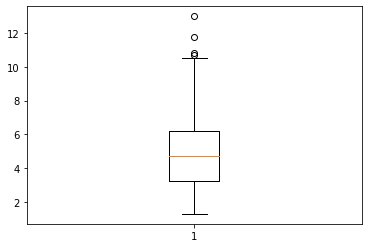

In [11]:
plt.boxplot('color_intensity', data=wine)
plt.show()

In [20]:
q1 = wine['color_intensity'].quantile(0.25)
q3 = wine['color_intensity'].quantile(0.75)
IQR = q3 - q1

cond = (wine['color_intensity'] < q1 - 1.5 * IQR) | (wine['color_intensity'] > q3 + 1.5 * IQR)

temp=wine['color_intensity']
outliers=temp[cond].to_frame()
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [21]:
drop_outliers = wine.drop(index=drop_outliers.index)
drop_outliers

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [23]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN
wine.loc[outliers.index, 'color_intensity']

151   NaN
158   NaN
159   NaN
166   NaN
Name: color_intensity, dtype: float64

In [36]:
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())

In [37]:
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [38]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [39]:
pd.get_dummies(wine, columns=['Class'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class_class_0,Class_class_1,Class_class_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0,0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0,0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0,0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0,0,1


In [40]:
from sklearn.model_selection import train_test_split

In [42]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [43]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2)
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [44]:
X, y = train_test_split(iris, test_size = 0.2)

X.shape, y.shape

((120, 5), (30, 5))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2, stratify=iris['Class'])
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [46]:
y_train.value_counts(), y_test.value_counts()

(Virginica      40
 Setosa         40
 Versicolour    40
 Name: Class, dtype: int64, Setosa         10
 Virginica      10
 Versicolour    10
 Name: Class, dtype: int64)

In [47]:
from sklearn.preprocessing import StandardScaler

StdScaler = StandardScaler()

StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

X_test_sc = StdScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.46, 3.18) (0.00, 1.00)
Test_scaled (-1.99, 2.57) (0.07, 1.06)


In [48]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

X_test_sc = MmScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))
     

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.45, 0.26)
Test_scaled (-0.03, 1.06) (0.46, 0.28)


In [50]:
from sklearn.preprocessing import RobustScaler


RuScaler = RobustScaler()
##Quantile Range 조절 가능
RuScaler2 = RobustScaler(quantile_range=(10.0, 90.0))

RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)
X_test_sc = RuScaler.transform(X_test)

RuScaler2.fit(X_train)
X_train_sc2 = RuScaler2.transform(X_train)
X_test_sc2 = RuScaler2.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc2.min(), X_train_sc2.max(),  X_train_sc2.mean(),  X_train_sc2.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc2.min(), X_test_sc2.max(),  X_test_sc2.mean(),  X_test_sc2.std()))

		(min, max) (mean, std)
Train_scaled (-2.00, 2.80) (-0.03, 0.64)
Test_scaled (-1.60, 1.62) (0.02, 0.70)
Train_scaled (-0.91, 1.27) (-0.03, 0.40)
Test_scaled (-0.75, 1.00) (-0.01, 0.43)


In [54]:
pd.DataFrame(RuScaler.inverse_transform(X_train_sc))

,0,1,2,3
0,6.6,3.0,4.4,1.4
1,6.5,3.0,5.2,2.0
2,4.8,3.1,1.6,0.2
3,7.2,3.2,6.0,1.8
4,5.5,4.2,1.4,0.2
...,...,...,...,...
115,5.8,2.6,4.0,1.2
116,4.8,3.4,1.9,0.2
117,4.4,2.9,1.4,0.2
118,7.0,3.2,4.7,1.4


In [55]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [56]:
# 수치형 데이터만 추출
x = iris.drop(columns = 'Class')

# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [62]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

print(pca.singular_values_)
print(pca.explained_variance_ratio_)

pca.components_

[20.92306556 11.7091661   4.69185798  1.76273239]
[0.72962445 0.22850762 0.03668922 0.00517871]


array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

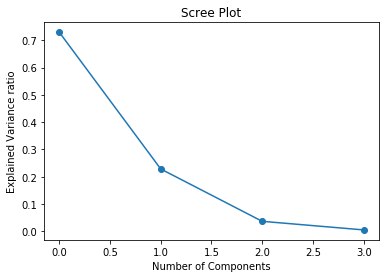

In [64]:
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance ratio')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()
     

In [65]:
pca = PCA(n_components = 2)                       
principalComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principalComponents, columns =['pc1', 'pc2']) 
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


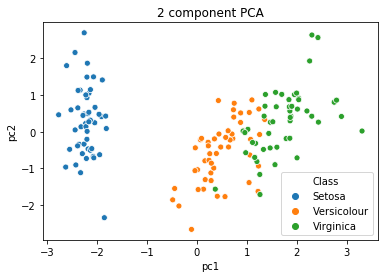

In [67]:
import seaborn as sns

plt.title("2 component PCA")
sns.scatterplot(x='pc1', y='pc2', hue=iris['Class'], data=principal_iris)
plt.show()

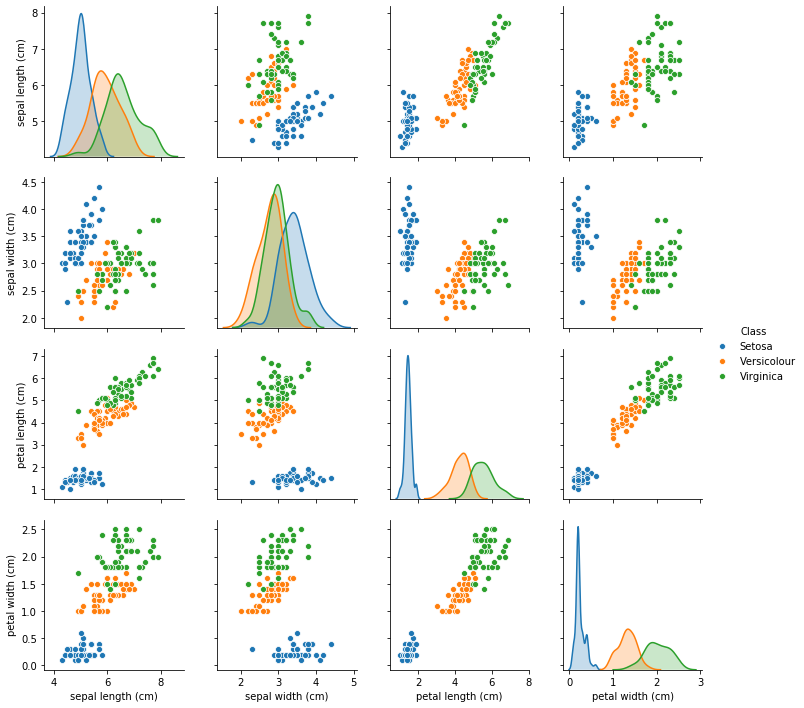

In [69]:
from pandas.plotting import scatter_matrix

sns.pairplot(iris, hue='Class')
plt.show()

In [70]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))
     

Counter({0: 1900, 1: 100})


In [71]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [72]:
undersample = RandomUnderSampler(sampling_strategy=0.5) 
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


In [80]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x,y)
print(Counter(y_under))

Counter({0: 1900, 1: 950})


In [76]:
pd.DataFrame(x_under)

,0,1,2,3,4,5
0,0.683646,-0.467593,0.978768,-0.363786,-0.634948,-1.216336
1,0.196799,-1.067027,1.805516,-0.774486,-1.124259,0.753190
2,1.177749,-0.944349,0.959535,-0.602422,-0.510724,0.331520
3,0.357193,-1.534100,-0.439222,-0.718811,0.685967,-0.453482
4,0.800200,-0.098406,-1.512599,0.146932,1.170059,0.500956
...,...,...,...,...,...,...
2845,0.619250,2.751610,1.552107,1.189888,-1.810160,1.108859
2846,0.104271,1.132703,-1.051855,0.709695,0.537442,0.024981
2847,-2.420011,1.303132,-0.224594,0.688315,-0.129295,0.856776
2848,-2.420011,1.303132,-0.224594,0.688315,-0.129295,0.856776


In [77]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,0.683646,-0.467593,0.978768,-0.363786,-0.634948,-1.216336
1,0.196799,-1.067027,1.805516,-0.774486,-1.124259,0.753190
2,1.177749,-0.944349,0.959535,-0.602422,-0.510724,0.331520
3,0.357193,-1.534100,-0.439222,-0.718811,0.685967,-0.453482
4,0.800200,-0.098406,-1.512599,0.146932,1.170059,0.500956
...,...,...,...,...,...,...
1995,-1.512231,-0.280647,-1.598162,0.065884,1.276875,0.820443
1996,0.983406,-1.258790,0.601789,-0.714939,-0.167035,-0.015010
1997,-0.206898,-0.914915,1.277797,-0.628923,-0.758920,0.338213
1998,0.437367,-1.078396,1.998014,-0.805269,-1.267669,-0.100055


In [78]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))
     

Counter({0: 1900, 1: 1900})


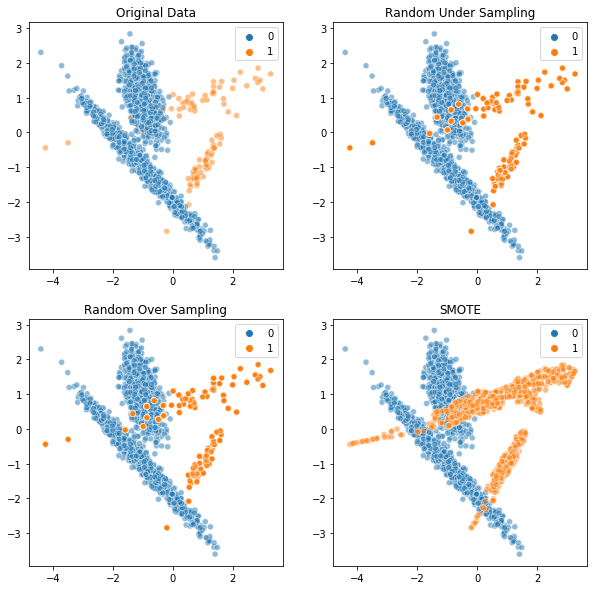

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(x[:, 1], x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x_under[:, 1], x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x_over[:, 1], x_over[:, 2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x_sm[:, 1], x_sm[:, 2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()
     